In [1]:
import matplotlib.pyplot as plt
from collections import defaultdict
import csv

In [10]:
def plot_results(path_to_results, name, save=False):
    acc = defaultdict(list)
    models = []

    with open(path_to_results) as f:
        reader = csv.DictReader(f)

        for row in reader:
            model = row['Model']
            models.append(model)
            for key in ("Overall","Curb Ramp","Missing Ramp","Obstruction","Sfc Problem","Null"):
                acc[key].append( float(row[key]) )
                
    fancy_models = ['DC Baseline', 'DC+{}', '{}', '{},\ninit with DC']
    fancy_models = map(lambda x: str.format(x, name), fancy_models)

    plt.figure(figsize=(7,7))
    for label, color in (('Curb Ramp', 'C2'), ('Missing Ramp', 'C3'), ('Obstruction','C0'), ('Sfc Problem','C1'), ('Null','C4'), ('Overall','black')):
        style = {"linestyle"   : 'dashed' if label != 'Overall' else 'solid',
                 "marker"      : 'o',
                 "linewidth"   : 1 if label != 'Overall' else 3,
                 "label"       : label,
                 "color"       : color
                }
        if label == 'Overall':
            style['alpha'] = .6
        plt.plot(fancy_models, acc[label], **style)

    plt.xlabel("Dataset used for Training")
    plt.ylabel('Recall (%)')
    plt.ylim((0,100))
    plt.legend()
    
    if save:
        savename = "{}_acc".format(name.lower())
        plt.savefig('/Users/galenweld/sidewalk-cv-assets19/figures_for_paper/pngs/{}.png'.format(savename), dpi = 300)

    plt.show()

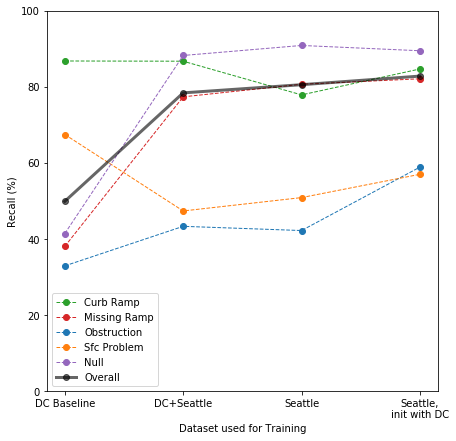

In [11]:
plot_results('seattle_results_for_figs_new.csv', "Seattle", save=True)

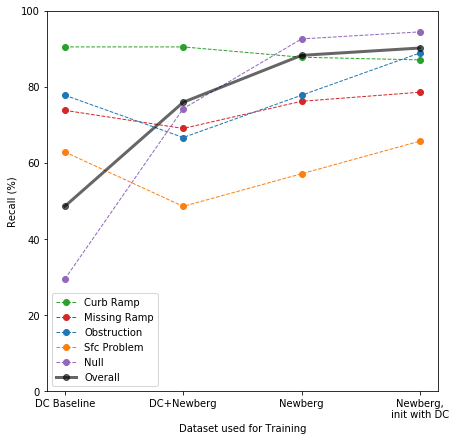

In [12]:
plot_results('newberg_results_for_figs.csv', "Newberg", save=True)